# Lab 5: FNNs in Keras
COSC 410: Applied Machine Learning\
Colgate University\
*Prof. Apthorpe*

This lab is due to Gradescope by the beginning of lab next week (2:45p on 3/3). You may work with a partner on this lab – if you do, submit only one solution as a “group” on Gradescope.


## Introduction

The purpose of this lab is for you to practice creating feedforward neural networks in Keras. Upon completing this lab, you should be comfortable using the `Sequential` class to create and train Keras FNN models. 

We will be using the CIFAR-10 dataset for Parts 1-3 of this lab. Like Iris, MNIST, and Fashion MNIST, CIFAR-10 is a well-known image classification dataset for practicing ML algorithms. Read the description of the dataset here: https://www.cs.toronto.edu/\%7Ekriz/cifar.html

## Provided Files
 * `Lab5.ipynb`: This file...that's it!
 
## Part 1: Data Import and Exploration

The following cell imports all libraries needed for Parts 1-3, loads the CIFAR-10 dataset, and splits the data into training and test sets:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as ks

np.random.seed(0) # set random seeds so everyone gets same results
tf.random.set_seed(1)

cifar10 = ks.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels,  test_labels = train_labels.flatten(), test_labels.flatten()

class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

Your first task is to examine the shape of the data. In the following cell, print the shape of `train_images` and `test_images`

In [3]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In the following text cell, describe why the CIFAR-10 images are 3D while the Fashion MNIST images we used in class were 2D:

Next, print the number of examples in each class in the training and test sets:

In [4]:
print(len(train_labels))
print(len(test_labels))

50000
10000


Using the `plt.imshow` function, display the first two images in the training set and print their correct labels:

Frog
Truck


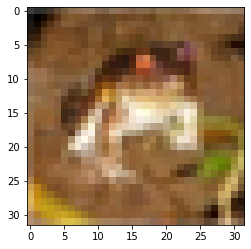

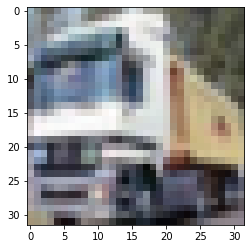

In [5]:
for i in range(2):
    plt.figure()
    plt.imshow(train_images[i])
    print(class_names[train_labels[i]])

## Part 2: Initial Model Creation

The following cell contains the start of a Keras `Sequential` model:

In [6]:
model = ks.Sequential()

2022-03-02 16:14:21.095339: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Add a layer that will flatten the 3D input images into a 1D vector:

In [7]:
model.add(ks.layers.Flatten(input_shape = [32,32,3]))

Then add the needed `Dense` layers to create this architecture:

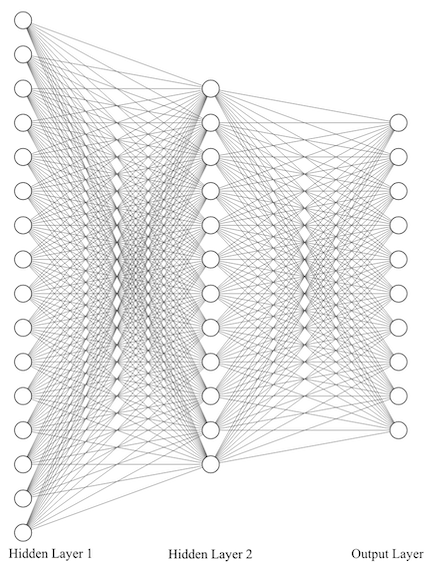

Use `"relu"` activations for the hidden layers, and choose the correct ouput layer activation function for this multiclass classification task

In [8]:
model.add(ks.layers.Dense(16, activation = "relu"))
model.add(ks.layers.Dense(12, activation = "relu"))
model.add(ks.layers.Dense(10, activation = "softmax"))

Now use the `.summary()` method to inspect your model:

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 16)                49168     
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 10)                130       
                                                                 
Total params: 49,502
Trainable params: 49,502
Non-trainable params: 0
_________________________________________________________________


As a spoiler, this model will not do a great job classifying CIFAR-10. In the next cell, speculate one reason why this might be the case.

Now compile the model using the correct loss function, the `adam` optimizer, and the `"accuracy"` metric

In [10]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

Next, fit the model on the training data for 20 epochs using a batch size of 100 and a 85%/15% train/validation split

In [11]:
model.fit(train_images, train_labels, epochs=20, batch_size = 100, validation_split=.15)

Epoch 1/20
425/425 [==============================] - 1s 2ms/step - loss: 5.0317 - accuracy: 0.1010 - val_loss: 2.3027 - val_accuracy: 0.0975
Epoch 2/20
425/425 [==============================] - 1s 1ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0975
Epoch 3/20
425/425 [==============================] - 1s 1ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0953
Epoch 4/20
425/425 [==============================] - 1s 1ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3029 - val_accuracy: 0.0972
Epoch 5/20
425/425 [==============================] - 1s 1ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.0953
Epoch 6/20
425/425 [==============================] - 1s 1ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.0984
Epoch 7/20
425/425 [==============================] - 1s 1ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3028 - val_accuracy: 0.0953
Epoch 

The validation accuracy at the last epoch is a good approximation of the performance of the model. How does this compare to choosing classes at random?

## Part 3. Experiment with Preprocessing and Model Architectures

Starting with the network from Part 2 above, *create and train* new models with the specified modifications in each of the cells below. If a hyperparameter is not specified, use the same setting as in the prior network

### 3.0 Normalization
Unlike Fashion MNIST, the CIFAR-10 dataset is not standardized to [0,1] grayscale. 
 * Perform normalization *within the Keras model* by adding a `ks.layers.BatchNormalization()` layer immediately after the `Flatten` layer. You do not need to specify any arguments to this layer, although the docs are here if you are curious: https://keras.io/api/layers/normalization_layers/batch_normalization/

In [12]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape = [32,32,3]))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dense(16, activation = "relu"))
model.add(ks.layers.Dense(12, activation = "relu"))
model.add(ks.layers.Dense(10, activation = "softmax"))
model.summary()
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
model.fit(train_images, train_labels, epochs=20, batch_size = 100, validation_split=.15)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization (BatchN  (None, 3072)             12288     
 ormalization)                                                   
                                                                 
 dense_3 (Dense)             (None, 16)                49168     
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
 dense_5 (Dense)             (None, 10)                130       
                                                                 
Total params: 61,790
Trainable params: 55,646
Non-trainable params: 6,144
______________________________________________

What does this example tell you about the importance of standardization/normalization?

### 3.1 Funnel network
  * 4 hidden layers with the following numbers of neurons: [256, 128, 64, 32]
  
Use a loop to add the layers instead of copying and pasting


In [13]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape = [32,32,3]))
model.add(ks.layers.BatchNormalization())
for i in [256, 128, 64, 32]:
    if i > 32:
        model.add(ks.layers.Dense(i, activation = "relu"))
    else:
        model.add(ks.layers.Dense(i, activation = "softmax"))
model.summary()
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
model.fit(train_images, train_labels, epochs=20, batch_size = 100, validation_split=.15)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 256)               786688    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                      

How much did this model increase the validation accuracy over the previous network? Was this increase more or less than might have expected? Why?

What does this example demonstrate about the tradeoffs between model size, accuracy, and overfitting?

### 3.2 Architecture of your choice
  *  Use an architecture you think might work better for this task than the one above

In [15]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape = [32,32,3]))
model.add(ks.layers.BatchNormalization())
for i in [256, 128, 64, 32, 10]:
    if i > 10:
        model.add(ks.layers.Dense(i, activation = "relu"))
    else:
        model.add(ks.layers.Dense(i, activation = "softmax"))
model.summary()
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
model.fit(train_images, train_labels, epochs=20, batch_size = 100, validation_split=.15)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 3072)             12288     
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 256)               786688    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                      

Did your choice of architecture work better, worse, or approximately the same as the previous example? Hypothesize why or why not!

## Part 4. Meet the New Task...Same as the Old Task

For the last part of this lab, return to a dataset and ML task from any class or lab in the first half of the semester. Load the data, perform any necessary preprocessing, and train a feedforward network with your choice of architecture to perform the task. You may add as many cells as needed.

In [27]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.images
y= digits.target
print(X.shape)
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape = [8,8]))
model.add(ks.layers.BatchNormalization())
for i in [128, 64, 32]:
    if i > 32:
        model.add(ks.layers.Dense(i, activation = "relu"))
    else:
        model.add(ks.layers.Dense(i, activation = "softmax"))
model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])
model.fit(X, y, epochs=20, batch_size = 100, validation_split=.15)

(1797, 8, 8)
Epoch 1/20
16/16 [==============================] - 0s 12ms/step - loss: 2.8901 - accuracy: 0.2521 - val_loss: 2.4188 - val_accuracy: 0.2519
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 1.4773 - accuracy: 0.7505 - val_loss: 1.0812 - val_accuracy: 0.6815
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.6679 - accuracy: 0.8500 - val_loss: 0.6876 - val_accuracy: 0.8074
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.9155 - val_loss: 0.6489 - val_accuracy: 0.8259
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 0.2526 - accuracy: 0.9450 - val_loss: 0.5205 - val_accuracy: 0.8481
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9587 - val_loss: 0.4423 - val_accuracy: 0.8593
Epoch 7/20
16/16 [==============================] - 0s 3ms/step - loss: 0.1346 - accuracy: 0.9718 - val_loss: 0.4168 - val_accuracy: 0.8704
Epoch 

Print the total number of weight and bias parameters in this FNN:

In [28]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 64)                0         
                                                                 
 batch_normalization_14 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_57 (Dense)            (None, 128)               8320      
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dense_59 (Dense)            (None, 32)                2080      
                                                                 
Total params: 18,912
Trainable params: 18,784
Non-trainable params: 128
_______________________________________________

How does the number of FNN parameters compare to the number of parameters in the shallow model you used in the earlier class/lab?

Does this FNN perform better, worse, or approximately the same as the shallow method you used in the earlier class/lab? Why do you think this might be the case?

# Submission Instructions
 * Submit your completed  `Lab5.ipynb` file to Gradescope. Be sure to list all of your group members in the submission!